In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import read_mist_models

# import matplotlib as mpl
# from matplotlib.gridspec import GridSpec
# from ipywidgets import interact, IntSlider, FloatSlider, fixed
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel

In [3]:
%matplotlib inline

In [4]:
plt.style.use('court.mplstyle')

In [5]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
# highmass_rc_newvals
adopted_masses = pd.read_csv('../datatables/adopted_masses.csv')
sample_mask = np.logical_and(adopted_masses['corr_mass']>3.0,highmass_rc_newvals['pysyd_numax']>20)

# Solar metallicity

In [76]:
## solar metal case
eep = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00300M.track.eep')
eep1 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00320M.track.eep')
eep2 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00340M.track.eep')
eep3 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00360M.track.eep')
eep4 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00380M.track.eep')
eep5 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00400M.track.eep')

# eep = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00200M.track.eep')
# eep1 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00220M.track.eep')
# eep2 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00240M.track.eep')
# eep3 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00260M.track.eep')
# eep4 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00280M.track.eep')
# eep5 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00300M.track.eep')

# eep = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')
# eep1 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00120M.track.eep')
# eep2 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00140M.track.eep')
# eep3 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00160M.track.eep')
# eep4 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00180M.track.eep')
# eep5 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00200M.track.eep')

# eep = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00075M.track.eep')
# eep1 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00080M.track.eep')
# eep2 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00085M.track.eep')
# eep3 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00090M.track.eep')
# eep4 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')
# eep5 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00110M.track.eep')

Reading in: ../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00075M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00080M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00085M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00090M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00110M.track.eep


In [77]:
# print('version: ', eep.version)
# print('abundances: ', eep.abun)
# print('rotation: ', eep.rot)
print('initial mass: ', eep.minit)
print('available columns: ', eep.hdr_list)

initial mass:  0.75
available columns:  ['star_age', 'star_mass', 'star_mdot', 'he_core_mass', 'c_core_mass', 'o_core_mass', 'log_L', 'log_L_div_Ledd', 'log_LH', 'log_LHe', 'log_LZ', 'log_Teff', 'log_abs_Lgrav', 'log_R', 'log_g', 'log_surf_z', 'surf_avg_omega', 'surf_avg_v_rot', 'surf_num_c12_div_num_o16', 'v_wind_Km_per_s', 'surf_avg_omega_crit', 'surf_avg_omega_div_omega_crit', 'surf_avg_v_crit', 'surf_avg_v_div_v_crit', 'surf_avg_Lrad_div_Ledd', 'v_div_csound_surf', 'surface_h1', 'surface_he3', 'surface_he4', 'surface_li7', 'surface_be9', 'surface_b11', 'surface_c12', 'surface_c13', 'surface_n14', 'surface_o16', 'surface_f19', 'surface_ne20', 'surface_na23', 'surface_mg24', 'surface_si28', 'surface_s32', 'surface_ca40', 'surface_ti48', 'surface_fe56', 'log_center_T', 'log_center_Rho', 'center_degeneracy', 'center_omega', 'center_gamma', 'mass_conv_core', 'center_h1', 'center_he4', 'center_c12', 'center_n14', 'center_o16', 'center_ne20', 'center_mg24', 'center_si28', 'pp', 'cno', 'tr

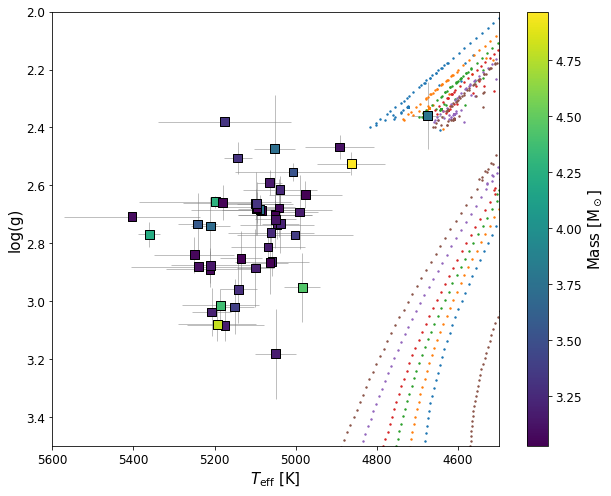

In [78]:
# plt.plot(T,L)
# plt.plot(T,g,marker='o',markersize=1)
plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],
#             c=highmass_rc_newvals['suppressed_flag'][sample_mask],
            zorder=3,marker='s',s=75,alpha=1,edgecolor='k',linewidth=1,cmap='viridis')
plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
             xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             yerr=highmass_rc_newvals['log(g)_e_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.colorbar(label=r'Mass [M$_\odot$]')

plt.scatter(10**eep.eeps['log_Teff'],eep.eeps['log_g'],s=2,label='3M')
plt.scatter(10**eep1.eeps['log_Teff'],eep1.eeps['log_g'],s=2,label='3.2M')
plt.scatter(10**eep2.eeps['log_Teff'],eep2.eeps['log_g'],s=2,label='3.4M')
plt.scatter(10**eep3.eeps['log_Teff'],eep3.eeps['log_g'],s=2,label='3.6M')
plt.scatter(10**eep4.eeps['log_Teff'],eep4.eeps['log_g'],s=2,label='3.8M')
plt.scatter(10**eep5.eeps['log_Teff'],eep5.eeps['log_g'],s=2,label='4M')


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel(r'$T_{\rm{eff}}$ [K]')
plt.ylabel(r'log(g)')
plt.ylim(3.5,2)
plt.xlim(5600,4500)
plt.show()

In [79]:
nu_max_solar = 3090 #uHz
delta_nu_solar = 135.1 #uHz
log_g_solar = 4.4378
g_solar = 27400 #cm/s
teff_solar = 5777 #K

def derive_numax(logg,teff):
    return (((10**logg)/g_solar)/np.sqrt(teff/teff_solar))*nu_max_solar

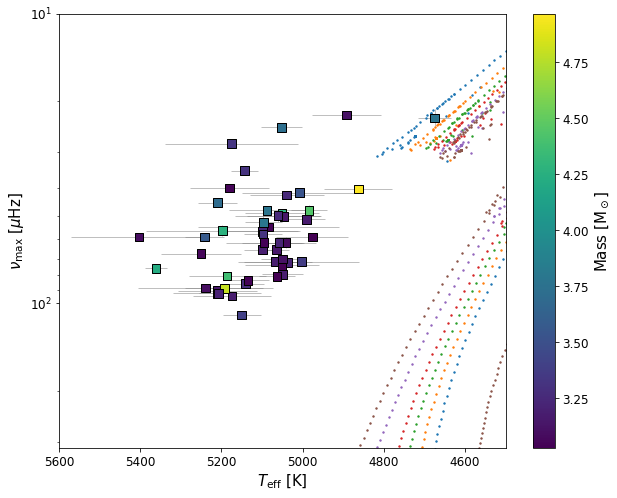

In [80]:
plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],
#             c=highmass_rc_newvals['suppressed_flag'][sample_mask],
            zorder=3,marker='s',s=75,alpha=1,edgecolor='k',linewidth=1,cmap='viridis')
plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
             xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.colorbar(label=r'Mass [M$_\odot$]')

plt.scatter(10**eep.eeps['log_Teff'],
            derive_numax(eep.eeps['log_g'],10**eep.eeps['log_Teff']),s=2,label='3M')
plt.scatter(10**eep1.eeps['log_Teff'],
            derive_numax(eep1.eeps['log_g'],10**eep1.eeps['log_Teff']),s=2,label='3.2M')
plt.scatter(10**eep2.eeps['log_Teff'],
            derive_numax(eep2.eeps['log_g'],10**eep2.eeps['log_Teff']),s=2,label='3.4M')
plt.scatter(10**eep3.eeps['log_Teff'],
            derive_numax(eep3.eeps['log_g'],10**eep3.eeps['log_Teff']),s=2,label='3.6M')
plt.scatter(10**eep4.eeps['log_Teff'],
            derive_numax(eep4.eeps['log_g'],10**eep4.eeps['log_Teff']),s=2,label='3.8M')
plt.scatter(10**eep5.eeps['log_Teff'],
            derive_numax(eep5.eeps['log_g'],10**eep5.eeps['log_Teff']),s=2,label='4M')


plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.xlabel(r'$T_{\rm{eff}}$ [K]')
plt.ylabel(r'$\nu_{\rm max}$ [$\mu$Hz]')
plt.ylim(10**(2.5),10**(1))
plt.yscale('log')
# plt.ylabel(r'log(g)')
# plt.ylim(3.5,2)
plt.xlim(5600,4500)
plt.show()

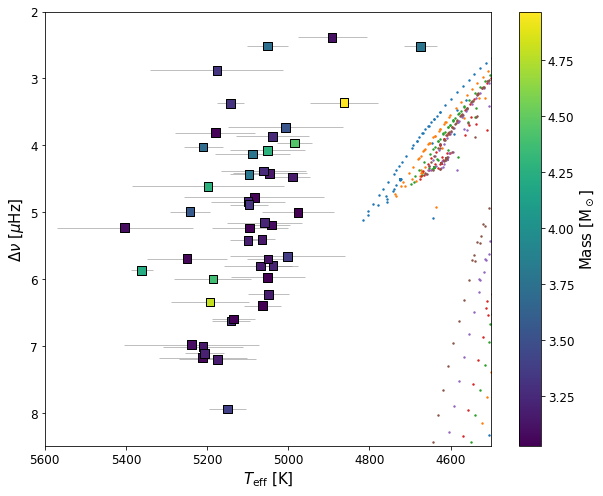

In [81]:
plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_dnu'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],
#             c=highmass_rc_newvals['suppressed_flag'][sample_mask],
            zorder=3,marker='s',s=75,alpha=1,edgecolor='k',linewidth=1,cmap='viridis')
plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_dnu'][sample_mask],
             xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_dnu'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.colorbar(label=r'Mass [M$_\odot$]')

plt.scatter(10**eep.eeps['log_Teff'],eep.eeps['delta_nu'],s=2,label='3M')
plt.scatter(10**eep1.eeps['log_Teff'],eep1.eeps['delta_nu'],s=2,label='3.2M')
plt.scatter(10**eep2.eeps['log_Teff'],eep2.eeps['delta_nu'],s=2,label='3.4M')
plt.scatter(10**eep3.eeps['log_Teff'],eep3.eeps['delta_nu'],s=2,label='3.6M')
plt.scatter(10**eep4.eeps['log_Teff'],eep4.eeps['delta_nu'],s=2,label='3.8M')
plt.scatter(10**eep5.eeps['log_Teff'],eep5.eeps['delta_nu'],s=2,label='4M')


plt.gca().invert_xaxis()
plt.ylim(2,8.5)
plt.gca().invert_yaxis()
plt.xlabel(r'$T_{\rm{eff}}$ [K]')
plt.ylabel(r'$\Delta\nu$ [$\mu$Hz]')
# plt.ylim(10**(2.5),10**(1))
# plt.yscale('log')
# plt.ylabel(r'log(g)')
# plt.ylim(3.5,2)
plt.xlim(5600,4500)
plt.show()

In [82]:
5000-400

4600

In [83]:
def calc_cheb_percentage(eep):
#     mask = np.where(np.logical_and(np.abs(10**(eep.eeps['log_Teff'])-5000)<400,eep.eeps['star_age']>10**7),True,False)
    mask = np.where(np.abs(10**(eep.eeps['log_Teff'])-5000)<400,True,False)
    #     mask2 = np.where(eep.eeps['nu_max']>1,True,False)
    mask = mask #& mask2

    age = np.asarray(eep.eeps['star_age'][mask])
    phase = np.asarray(eep.eeps['phase'][mask])

    percent_in_cheb = ((np.max(age[phase==3])-np.min(age[phase==3]))/
                       ((np.max(age[phase==2])-np.min(age[phase==2]))+np.max(age[phase==3])-np.min(age[phase==3])))
    print(percent_in_cheb)
#     return percent_in_cheb

In [84]:
def calc_cheb_percentage_dnu(eep):
#     mask = np.where(np.logical_and(np.abs(10**(eep.eeps['log_Teff'])-5000)<400,eep.eeps['star_age']>10**7),True,False)
    mask = np.where(np.abs((eep.eeps['delta_nu'])-5)<3,True,False)
    #     mask2 = np.where(eep.eeps['nu_max']>1,True,False)
    mask = mask #& mask2

    age = np.asarray(eep.eeps['star_age'][mask])
    phase = np.asarray(eep.eeps['phase'][mask])
#     print(phase)

    percent_in_cheb = ((np.max(age[phase==3])-np.min(age[phase==3]))/
                       ((np.max(age[phase==2])-np.min(age[phase==2]))+np.max(age[phase==3])-np.min(age[phase==3])))
    print(percent_in_cheb)
#     return percent_in_cheb

In [85]:
### solar metal case
eep_list = [eep,eep1,eep2,eep3,eep4,eep5]

for eep_ind in eep_list:
    print(eep_ind.minit)
    calc_cheb_percentage(eep_ind)
    calc_cheb_percentage_dnu(eep_ind)

0.75
0.048745493816200164
0.42036051175441463
0.8
0.05567150920682402
0.44961648951326244
0.85
0.059747744784023504
0.4631723076865673
0.9
0.0775767738208571
0.4635170455570835
1.0
0.1159385437854113
0.49248013610888347
1.1
0.16613951629687526
0.5375808627983311


# Metal poor case

In [47]:
## metal poor case

eep = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00300M.track.eep')
eep1 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00320M.track.eep')
eep2 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00340M.track.eep')
eep3 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00360M.track.eep')
eep4 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00380M.track.eep')
eep5 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00400M.track.eep')

Reading in: ../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00300M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00320M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00340M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00360M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00380M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_m0.25_afe_p0.0_vvcrit0.0_EEPS/00400M.track.eep


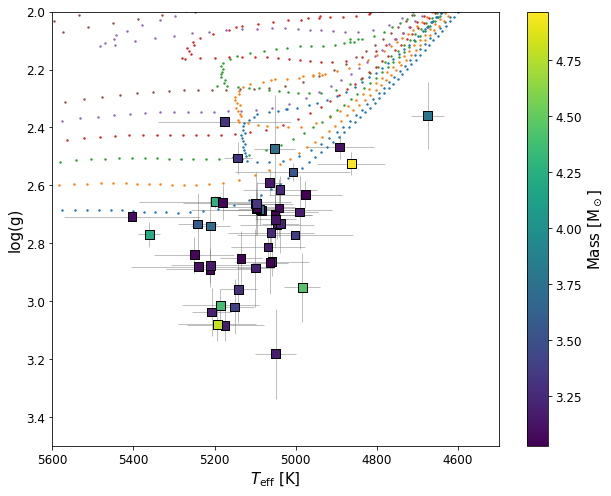

In [48]:
# plt.plot(T,L)
# plt.plot(T,g,marker='o',markersize=1)
plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],
#             c=highmass_rc_newvals['suppressed_flag'][sample_mask],
            zorder=3,marker='s',s=75,alpha=1,edgecolor='k',linewidth=1,cmap='viridis')
plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
             xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             yerr=highmass_rc_newvals['log(g)_e_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.colorbar(label=r'Mass [M$_\odot$]')

plt.scatter(10**eep.eeps['log_Teff'][500:],eep.eeps['log_g'][500:],s=2,label='3M')
plt.scatter(10**eep1.eeps['log_Teff'][500:],eep1.eeps['log_g'][500:],s=2,label='3.2M')
plt.scatter(10**eep2.eeps['log_Teff'][500:],eep2.eeps['log_g'][500:],s=2,label='3.4M')
plt.scatter(10**eep3.eeps['log_Teff'][500:],eep3.eeps['log_g'][500:],s=2,label='3.6M')
plt.scatter(10**eep4.eeps['log_Teff'][500:],eep4.eeps['log_g'][500:],s=2,label='3.8M')
plt.scatter(10**eep5.eeps['log_Teff'][500:],eep5.eeps['log_g'][500:],s=2,label='4M')


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel(r'$T_{\rm{eff}}$ [K]')
plt.ylabel(r'log(g)')
plt.ylim(3.5,2)
plt.xlim(5600,4500)
plt.show()

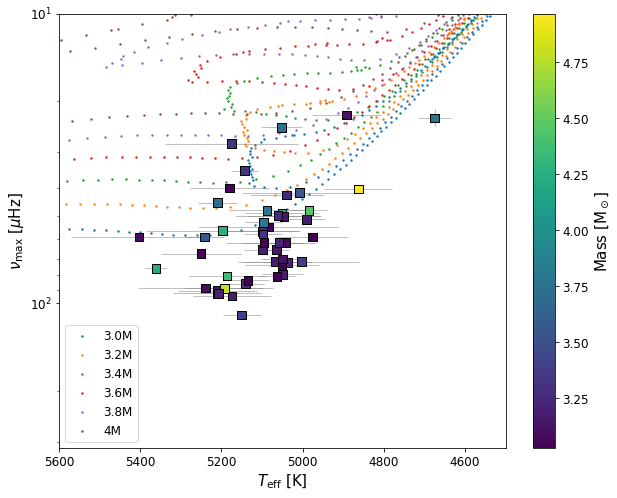

In [49]:
plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],
#             c=highmass_rc_newvals['suppressed_flag'][sample_mask],
            zorder=3,marker='s',s=75,alpha=1,edgecolor='k',linewidth=1,cmap='viridis')
plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
             xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.colorbar(label=r'Mass [M$_\odot$]')

# plt.scatter(10**eep.eeps['log_Teff'][mask],
#             derive_numax(eep.eeps['log_g'][mask],10**eep.eeps['log_Teff'][mask]),
#             c=eep.eeps['phase'][mask],cmap='bwr',s=2,label='3M')
# plt.scatter(10**eep3.eeps['log_Teff'][mask],
#             derive_numax(eep3.eeps['log_g'][mask],10**eep3.eeps['log_Teff'][mask]),
#             c=eep.eeps['phase'][mask],cmap='bwr',s=2,label='3.6M')

plt.scatter(10**eep.eeps['log_Teff'][500:],
            derive_numax(eep.eeps['log_g'][500:],10**eep.eeps['log_Teff'][500:]),s=2,label='3.0M')
plt.scatter(10**eep1.eeps['log_Teff'][500:],
            derive_numax(eep1.eeps['log_g'][500:],10**eep1.eeps['log_Teff'][500:]),s=2,label='3.2M')
plt.scatter(10**eep2.eeps['log_Teff'][500:],
            derive_numax(eep2.eeps['log_g'][500:],10**eep2.eeps['log_Teff'][500:]),s=2,label='3.4M')
plt.scatter(10**eep3.eeps['log_Teff'][500:],
            derive_numax(eep3.eeps['log_g'][500:],10**eep3.eeps['log_Teff'][500:]),s=2,label='3.6M')
plt.scatter(10**eep4.eeps['log_Teff'][500:],
            derive_numax(eep4.eeps['log_g'][500:],10**eep4.eeps['log_Teff'][500:]),s=2,label='3.8M')
plt.scatter(10**eep5.eeps['log_Teff'][500:],
            derive_numax(eep5.eeps['log_g'][500:],10**eep5.eeps['log_Teff'][500:]),s=2,label='4M')


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel(r'$T_{\rm{eff}}$ [K]')
plt.ylabel(r'$\nu_{\rm max}$ [$\mu$Hz]')
plt.ylim(10**(2.5),10**(1))
plt.yscale('log')
# plt.ylabel(r'log(g)')
# plt.ylim(3.5,2)
plt.xlim(5600,4500)
plt.show()

In [50]:
### metal poor case

eep_list = [eep,eep1,eep2,eep3,eep4,eep5]

for eep_ind in eep_list:
    print(eep_ind.minit)
    calc_cheb_percentage(eep_ind)
    calc_cheb_percentage_dnu(eep_ind)

3.0
0.9801807457799553
0.9753704820405347
3.2
0.9812223746249215
0.9763874217477184
3.4
0.9834768475348509
0.9764493594985726
3.6
0.9849883548082636
0.9640859189854281
3.8
0.9866343999667854
0.806664093727007
4.0
0.9879712509958836
0.8093415894490781


# Metal rich case

In [51]:
## metal rich case
eep = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00300M.track.eep')
eep1 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00320M.track.eep')
eep2 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00340M.track.eep')
eep3 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00360M.track.eep')
eep4 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00380M.track.eep')
eep5 = read_mist_models.EEP('../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00400M.track.eep')

Reading in: ../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00300M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00320M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00340M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00360M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00380M.track.eep
Reading in: ../data/olddata/MIST_v1.2_feh_p0.25_afe_p0.0_vvcrit0.0_EEPS/00400M.track.eep


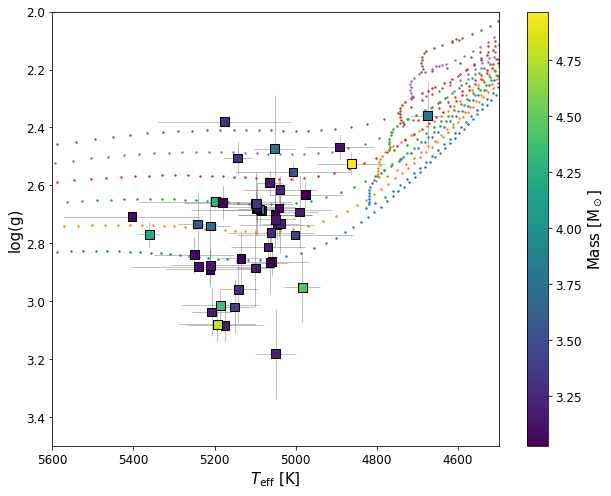

In [52]:
# plt.plot(T,L)
# plt.plot(T,g,marker='o',markersize=1)
plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],
#             c=highmass_rc_newvals['suppressed_flag'][sample_mask],
            zorder=3,marker='s',s=75,alpha=1,edgecolor='k',linewidth=1,cmap='viridis')
plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['log(g)_adopt'][sample_mask],
             xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             yerr=highmass_rc_newvals['log(g)_e_adopt'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.colorbar(label=r'Mass [M$_\odot$]')

plt.scatter(10**eep.eeps['log_Teff'][500:],eep.eeps['log_g'][500:],s=2,label='3M')
plt.scatter(10**eep1.eeps['log_Teff'][500:],eep1.eeps['log_g'][500:],s=2,label='3.2M')
plt.scatter(10**eep2.eeps['log_Teff'][500:],eep2.eeps['log_g'][500:],s=2,label='3.4M')
plt.scatter(10**eep3.eeps['log_Teff'][500:],eep3.eeps['log_g'][500:],s=2,label='3.6M')
plt.scatter(10**eep4.eeps['log_Teff'][500:],eep4.eeps['log_g'][500:],s=2,label='3.8M')
plt.scatter(10**eep5.eeps['log_Teff'][500:],eep5.eeps['log_g'][500:],s=2,label='4M')


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel(r'$T_{\rm{eff}}$ [K]')
plt.ylabel(r'log(g)')
plt.ylim(3.5,2)
plt.xlim(5600,4500)
plt.show()

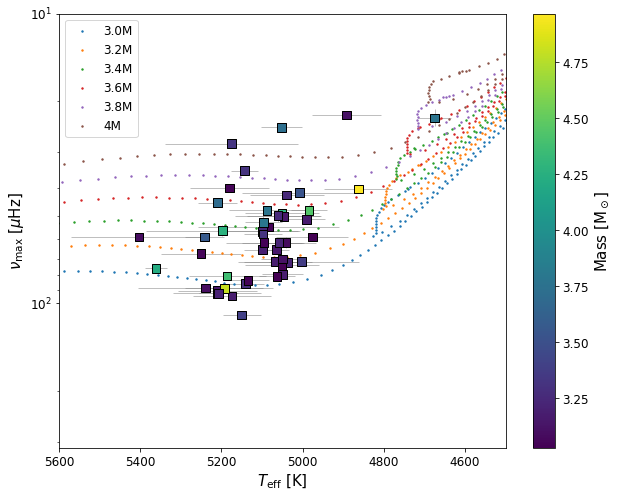

In [53]:
plt.scatter(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
            c=adopted_masses['corr_mass'][sample_mask],
#             c=highmass_rc_newvals['suppressed_flag'][sample_mask],
            zorder=3,marker='s',s=75,alpha=1,edgecolor='k',linewidth=1,cmap='viridis')
plt.errorbar(highmass_rc_newvals['Teff_adopt'][sample_mask],highmass_rc_newvals['pysyd_numax'][sample_mask],
             xerr=highmass_rc_newvals['Teff_e_adopt'][sample_mask],
             yerr=highmass_rc_newvals['e_pysyd_numax'][sample_mask],
             linestyle='None',color='grey',zorder=0,alpha=0.5)
# plt.axhline(0,color='grey',linestyle='--')
plt.colorbar(label=r'Mass [M$_\odot$]')

# plt.scatter(10**eep.eeps['log_Teff'][mask],
#             derive_numax(eep.eeps['log_g'][mask],10**eep.eeps['log_Teff'][mask]),
#             c=eep.eeps['phase'][mask],cmap='bwr',s=2,label='3M')
# plt.scatter(10**eep3.eeps['log_Teff'][mask],
#             derive_numax(eep3.eeps['log_g'][mask],10**eep3.eeps['log_Teff'][mask]),
#             c=eep.eeps['phase'][mask],cmap='bwr',s=2,label='3.6M')

plt.scatter(10**eep.eeps['log_Teff'][500:],
            derive_numax(eep.eeps['log_g'][500:],10**eep.eeps['log_Teff'][500:]),s=2,label='3.0M')
plt.scatter(10**eep1.eeps['log_Teff'][500:],
            derive_numax(eep1.eeps['log_g'][500:],10**eep1.eeps['log_Teff'][500:]),s=2,label='3.2M')
plt.scatter(10**eep2.eeps['log_Teff'][500:],
            derive_numax(eep2.eeps['log_g'][500:],10**eep2.eeps['log_Teff'][500:]),s=2,label='3.4M')
plt.scatter(10**eep3.eeps['log_Teff'][500:],
            derive_numax(eep3.eeps['log_g'][500:],10**eep3.eeps['log_Teff'][500:]),s=2,label='3.6M')
plt.scatter(10**eep4.eeps['log_Teff'][500:],
            derive_numax(eep4.eeps['log_g'][500:],10**eep4.eeps['log_Teff'][500:]),s=2,label='3.8M')
plt.scatter(10**eep5.eeps['log_Teff'][500:],
            derive_numax(eep5.eeps['log_g'][500:],10**eep5.eeps['log_Teff'][500:]),s=2,label='4M')


plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel(r'$T_{\rm{eff}}$ [K]')
plt.ylabel(r'$\nu_{\rm max}$ [$\mu$Hz]')
plt.ylim(10**(2.5),10**(1))
plt.yscale('log')
# plt.ylabel(r'log(g)')
# plt.ylim(3.5,2)
plt.xlim(5600,4500)
plt.show()

In [55]:
### metal rich case

eep_list = [eep,eep1,eep2,eep3,eep4,eep5]

for eep_ind in eep_list:
    print(eep_ind.minit)
    calc_cheb_percentage(eep_ind)
    calc_cheb_percentage_dnu(eep_ind)

3.0
0.9866701002475449
0.9741377797276592
3.2
0.9887494577021907
0.9756442944883522
3.4
0.9895902965856166
0.9763930410980255
3.6
0.9905238929917488
0.9771130469184176
3.8
0.9912642997325413
0.9774021370333631
4.0
0.9916221618389176
0.966383503628059
